## Importing Relevant Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import nltk.tokenize

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os

import tensorflow as tf
from tensorflow import keras

In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Lee Seung
[nltk_data]     Soo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lee Seung Soo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Preparing Data for Analysis

In [8]:
fakenewsdataset = pd.read_csv("fake_or_real_news.csv")
fakenewsdataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
#Creating new column for number of words in title
def word_count(title):
    count = 1
    for x in title:
        if x == " ":
            count += 1
    return count

fakenewsdataset["title count"] = word_count(fakenewsdataset['title'])
for y in range(0,6335):
    fakenewsdataset["title count"][y] = word_count(fakenewsdataset['title'][y])
fakenewsdataset


#create variable for tokenize
fakenewsdataset["tokenized"] = fakenewsdataset["title count"]
for x in range(0,6335):
    fakenewsdataset["tokenized"][x] = nltk.word_tokenize(fakenewsdataset["title"][x])
    
fakenewsdataset.head()

,Unnamed: 0,title,text,label,title count,tokenized
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,5,"[You, Can, Smell, Hillary, ’, s, Fear]"
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,14,"[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,9,"[Kerry, to, go, to, Paris, in, gesture, of, sy..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,15,"[Bernie, supporters, on, Twitter, erupt, in, a..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,9,"[The, Battle, of, New, York, :, Why, This, Pri..."


1. TFIDTransformer
Transform a count matrix to a normalized tf or tf-idf representation.
Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. 
This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

2. CountVectorizer 
Convert a collection of text documents to a matrix of token counts.

3. TfidfVectorizer
Convert a collection of raw documents to a matrix of TF-IDF features.

In [ ]:
#vectorisation to speed up process

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(fakenewsdataset)
freq_term_matrix = count_vectorizer.transform(fakenewsdataset)

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 5)	1.0
  (1, 3)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 3)	0.6340862024337309
  (4, 0)	0.7732623667832087
  (5, 4)	1.0


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
#This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing
from pycaret.nlp import *
%time 
fake_news_nlp = setup(data = fakenewsdataset, target = 'text', session_id = 123)

Description,Value
session_id,123
Documents,6335
Vocab Size,39536
Custom Stopwords,False


In [ ]:
%time 
lda = create_model('lda',multi_core=True)

In [ ]:
%time 
lda_df = assign_model(lda)

# Creating a Wordcloud for Data Visualisation

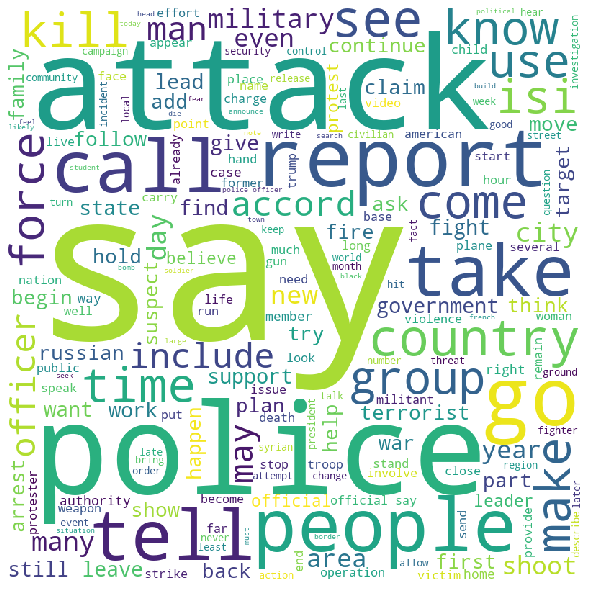

In [ ]:
#Create wordcloud
plot_model(lda, plot = 'wordcloud')

In [ ]:
#Create dataframe with only fake data
fake = fakenewsdataset[fakenewsdataset['label'] == 'FAKE']
fake

,Unnamed: 0,title,text,label,title count,tokenized
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,5,"[You, Can, Smell, Hillary, ’, s, Fear]"
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,14,"[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,15,"[Bernie, supporters, on, Twitter, erupt, in, a..."
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,2,"[Tehran, ,, USA]"
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,13,"[Girl, Horrified, At, What, She, Watches, Boyf..."
...,...,...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,12,"[DOJ, COMPLAINT, :, Comey, Under, Fire, Over, ..."
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,13,"[Radio, Derb, Is, On, The, Air–Leonardo, And, ..."
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,9,"[Assange, claims, ‘, crazed, ’, Clinton, campa..."
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,10,"[The, ‘, P, ’, in, PBS, Should, Stand, for, ‘,..."


In [ ]:
#Create dataframe with only real data
real = fakenewsdataset[fakenewsdataset['label'] == 'REAL']
real

,Unnamed: 0,title,text,label,title count,tokenized
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,9,"[Kerry, to, go, to, Paris, in, gesture, of, sy..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,9,"[The, Battle, of, New, York, :, Why, This, Pri..."
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,5,"[‘, Britain, ’, s, Schindler, ’, Dies, at, 106]"
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,9,"[Fact, check, :, Trump, and, Clinton, at, the,..."
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,11,"[Iran, reportedly, makes, new, push, for, uran..."
...,...,...,...,...,...,...
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,12,"[Alabama, Lawmaker, :, Same-Sex, Couples, Don,..."
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,10,"[GOP, Senator, David, Perdue, Jokes, About, Pr..."
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,11,"[State, Department, says, it, ca, n't, find, e..."
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,11,"[In, Ethiopia, ,, Obama, seeks, progress, on, ..."


## Creating Histograms to compare the title length distribution of FAKE and REAL news 

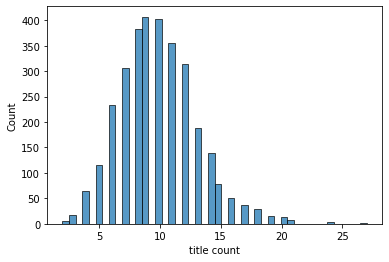

In [ ]:
#histogram for real data set
sb.histplot(data = real["title count"])

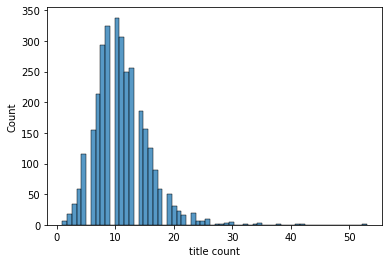

In [ ]:
#histogram for fake data set
sb.histplot(data = fake["title count"])

In [ ]:
real.describe()

,Unnamed: 0,title count
count,3171.000000,3171.000000
mean,2654.344056,9.861243
std,1531.720152,3.199711
min,2.000000,2.000000
25%,1317.500000,8.000000
50%,2676.000000,10.000000
75%,3992.500000,12.000000
max,5276.000000,27.000000


## Boxplots to determine whether fake news can be detected by length of title

<AxesSubplot:>

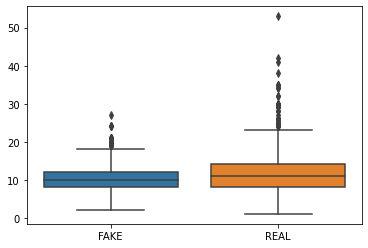

In [10]:
newsdf = pd.read_csv("fake_or_real_news.csv")
newsdf["title count"] = np.nan

for i in range (0,6335):
    newsdf["title count"][i] = word_count(newsdf["title"][i])

realdf = pd.DataFrame(columns = ["REAL"])
fakedf = pd.DataFrame(columns = ["FAKE"])

for i in range(0,6335):
    if newsdf["label"][i] == "FAKE":
        realdf = realdf.append({"REAL":newsdf["title count"][i]}, ignore_index = True)
    else:
        fakedf = fakedf.append({"FAKE":newsdf["title count"][i]}, ignore_index = True)
        
fakedf["REAL"] = realdf["REAL"]
realfakedf = fakedf
sb.boxplot(data = realfakedf)

1) The length of the title is not a good predictor of fake news, as the distribution of title count is very similar for both the fake and real datasets

2) Instead of using a simple regression model to detect news by length of the title, Natural Language Processing (NLP) to be used to compute the entire title of the news to come up with a prediction model to detect whether a news is fake or real